In [1]:
# Import all the things

import json
import pandas as pd
import numpy as np
import wrangle
import acquire
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, prep_string_data#, split_data

import re
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import nltk

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# use our own wrangle to get the data
# df = wrangle.get_npr_data()
# df.head()

### I'm interested in topic modeling on a story-level basis
### So I will need to groupby story_id_num

In [3]:
# df = df.sort_values(by=['story_id_num','utterance_order'])
# df.head()

In [4]:
# df = df[['story_id_num','utterance_order','title','lemmatized']]

In [5]:
# df_sample = df[:100]
# df_sample

In [6]:
# df_sample.shape

In [7]:
# pd.DataFrame(df_sample.groupby('title').apply(list).reset_index())

In [8]:
# df_sample.groupby(['story_id_num']).title.first()

In [9]:
# # group every story as an aggregation of all its utterances
# df_sample.groupby(['story_id_num']).lemmatized.agg(' '.join)#.iloc[0]

In [10]:
# # group every story as an aggregation of all its utterances and store in a DF
# stories_test = pd.DataFrame(df_sample.groupby(['story_id_num']).lemmatized.agg(' '.join))
# stories_test

In [11]:
# stories.iloc[0].values

### Run the above on the whole df

In [12]:
# df = df.sort_values(by=['story_id_num','utterance_order'])
# df.head()

In [13]:
# df.dtypes

In [14]:
# df.isna().sum()

In [15]:
# df = df.dropna()

#### well...it worked on the sample above
#### had to drop 2 nulls that existed in the lemmatized column

In [16]:
# # group every story as an aggregation of all its utterances and store in a DF
# stories = pd.DataFrame(df.groupby(['story_id_num']).lemmatized.agg(' '.join))
# stories

-  61,165 stories to work with here

In [17]:
# this attempt to get the word count for every story isn't working currently
# stories['word_count'] = df.lemmatized.apply(str.split).apply(len)
# stories.head()

In [18]:
# sia = nltk.sentiment.SentimentIntensityAnalyzer()
# stories['vader'] = stories.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
# stories.head()

In [19]:
# stories.to_csv('stories.csv')

In [20]:
stories = pd.read_csv('stories.csv')
stories.head()

,Unnamed: 0,story_id_num,lemmatized,vader,title,date,host,program
0,0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [21]:
stories = stories.drop(columns = ['Unnamed: 0'])

In [22]:
stories.shape

(61165, 7)

In [23]:
# len(df.groupby(['story_id_num']).title.first())

In [24]:
# stories['title'] = df.groupby(['story_id_num']).title.first().tolist()

In [25]:
stories.head()

,story_id_num,lemmatized,vader,title,date,host,program
0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [26]:
# stories['host'] = test[test.is_host==True].groupby('story_id_num').speaker.first().tolist()

In [27]:
# test = df.sort_values(by=['story_id_num'])

In [28]:
# test[test.is_host==True].groupby('story_id_num').speaker.first()

In [29]:
# df.head()

In [30]:
# stories['program'] = df.groupby(['story_id_num']).program.first().tolist()

In [31]:
stories.head()

,story_id_num,lemmatized,vader,title,date,host,program
0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [32]:
# stories.to_csv('stories.csv')

In [33]:
stories.vader.idxmax()

39

In [34]:
# stories.lemmatized[39]

In [65]:
stories.host.unique()

array(['melissa block', 'renee montagne', 'neal conan', 'ira flatow',
       'scott simon', 'rachel martin', 'david greene', 'steve inskeep',
       'noel king', 'mike pesca', 'farai chideya', 'tony cox',
       'michele norris', 'karen grigsby bates', 'flora lichtman',
       'audie cornish', 'robert smith', 'guy raz', 'jennifer ludden',
       'gwen thompkins', 'wade goodwyn', 'cory turner', 'tom goldman',
       'cheryl corley', 'deborah amos', 'joe palca', 'michel martin',
       'jackie northam', 'd', 'laura sullivan', 'ed gordon',
       'brian naylor', 'don gonyea', 'susan stamberg', 'adam davidson',
       'robert siegel', 'carrie kahn', 'ailsa chang', 'tamara keith',
       'richard gonzales', 'andrea seabrook', 'mary louise kelly',
       'lynn neary', 'ari shapiro', 'howard berkes', 'john ydstie',
       'eric westervelt', 'kelly mcevers', 'debbie elliott',
       'jacki lyden', 'linda wertheimer', 'daniel zwerdling',
       'lauren frayer', 'liane hansen', 'arun rath', 'ken

In [66]:
stories[stories.host == 'farai chideya'].vader.mean()

0.7487945063103195

In [35]:
stories[stories.host == 'rachel martin'].vader.mean()

0.5567598698481574

In [36]:
stories.vader.mean()

0.5210016202076574

In [37]:
stories.title[39]

'so hard to say goodbye: advice for farewell notes'

The first highest-sentiment article is about hallmark greeting cards

In [38]:
stories[stories.vader == 1]

,story_id_num,lemmatized,vader,title,date,host,program
39,620,"looking ahead to our last day , many of our fr...",1.0,so hard to say goodbye: advice for farewell notes,2013-06-27,neal conan,talk of the nation
42,623,"this is talk of the nation. i m neal conan , i...",1.0,a look ahead and a farewell to the political j...,2013-06-26,neal conan,talk of the nation
43,624,"this is talk of the nation. i m neal conan , i...",1.0,what changes after supreme court rulings on pr...,2013-06-26,neal conan,talk of the nation
44,625,"from small country church , to the stage of th...",1.0,gospel legend mavis staples comes 'full circle',2013-06-26,neal conan,talk of the nation
141,898,this is talk of the nation. i m neal conan in ...,1.0,'blood &amp; beauty' breathes new life into th...,2013-06-20,neal conan,talk of the nation
...,...,...,...,...,...,...,...
23796,84430,this is talk of the nation. i m neal conan in ...,1.0,state legislatures: agendas and budgets,2005-01-11,neal conan,talk of the nation
23995,84850,time now for a story that is decidedly not a n...,1.0,encore: an elf questions santa's naughty or ni...,2016-12-23,ari shapiro,all things considered
27366,90916,the political campaign are taking a break. the...,1.0,santa for president in 2016,2015-12-25,robert siegel,all things considered
30850,96419,"now we re going to take a break from news , fr...",1.0,listen: the not-so-true story of santa's naugh...,2014-12-25,robert siegel,all things considered


- Actually...there are 1345 stories with a max vader score

In [39]:
brightest_stories = stories[stories.vader == 1]
brightest_stories

,story_id_num,lemmatized,vader,title,date,host,program
39,620,"looking ahead to our last day , many of our fr...",1.0,so hard to say goodbye: advice for farewell notes,2013-06-27,neal conan,talk of the nation
42,623,"this is talk of the nation. i m neal conan , i...",1.0,a look ahead and a farewell to the political j...,2013-06-26,neal conan,talk of the nation
43,624,"this is talk of the nation. i m neal conan , i...",1.0,what changes after supreme court rulings on pr...,2013-06-26,neal conan,talk of the nation
44,625,"from small country church , to the stage of th...",1.0,gospel legend mavis staples comes 'full circle',2013-06-26,neal conan,talk of the nation
141,898,this is talk of the nation. i m neal conan in ...,1.0,'blood &amp; beauty' breathes new life into th...,2013-06-20,neal conan,talk of the nation
...,...,...,...,...,...,...,...
23796,84430,this is talk of the nation. i m neal conan in ...,1.0,state legislatures: agendas and budgets,2005-01-11,neal conan,talk of the nation
23995,84850,time now for a story that is decidedly not a n...,1.0,encore: an elf questions santa's naughty or ni...,2016-12-23,ari shapiro,all things considered
27366,90916,the political campaign are taking a break. the...,1.0,santa for president in 2016,2015-12-25,robert siegel,all things considered
30850,96419,"now we re going to take a break from news , fr...",1.0,listen: the not-so-true story of santa's naugh...,2014-12-25,robert siegel,all things considered


In [40]:
brightest_stories.title.sample(10).to_list()

['author explains mysteries of music and the mind',
 'poets tell the stories of their countries',
 "what's your major, and does it matter?",
 'how campaign finance ruling changes politics',
 'blogging for beginners',
 "the political junkie's vp debate preview",
 'steroids in baseball: why do we care?',
 'what do you want from your bank?',
 "'ask amy' memoir: the women behind the advice",
 "it takes guts to be 'the world's greatest stuntman'"]

In [41]:
stories[stories.vader == -1]

,story_id_num,lemmatized,vader,title,date,host,program
749,2749,this is talk of the nation. i m neal conan in ...,-1.0,"the epidemiology of gun violence: race, region...",2013-03-26,neal conan,talk of the nation
5731,19881,this is talk of the nation. i m neal conan in ...,-1.0,how do you define a hate crime?,2012-03-19,neal conan,talk of the nation
10730,55411,"this is talk of the nation. i m neal conan , i...",-1.0,understanding suicide terrorism and how to sto...,2010-10-11,neal conan,talk of the nation
11827,58454,this is talk of the nation. im neal conan in w...,-1.0,deconstructing 'myths about suicide',2010-04-28,neal conan,talk of the nation
15177,66409,this is talk of the nation. i m neal conan in ...,-1.0,the legacy of bush's 'war on terror',2009-01-12,neal conan,talk of the nation
17237,71520,this is talk of the nation. i m neal conan in ...,-1.0,who carries out suicide bombings?,2008-01-22,neal conan,talk of the nation
18838,75087,this is talk of the nation. i m neal conan in ...,-1.0,how do we define terrorism?,2007-06-04,neal conan,talk of the nation
21189,79688,"this is talk of the nation. i m neal conan , i...",-1.0,should the guantanamo prison be closed?,2006-05-23,neal conan,talk of the nation
21287,79858,"from npr news in washington , dc , i m neal co...",-1.0,'war of nerves': a history of chemical weapons,2006-05-08,neal conan,talk of the nation


- But only 9 stories with the lowest vader score, including...

In [42]:
# stories.lemmatized[749]

In [43]:
stories.title[749]

'the epidemiology of gun violence: race, region and policy'

- A story aboout "gun death , race , sex and region"

In [44]:
darkest_stories = stories[stories.vader == -1]
darkest_stories

,story_id_num,lemmatized,vader,title,date,host,program
749,2749,this is talk of the nation. i m neal conan in ...,-1.0,"the epidemiology of gun violence: race, region...",2013-03-26,neal conan,talk of the nation
5731,19881,this is talk of the nation. i m neal conan in ...,-1.0,how do you define a hate crime?,2012-03-19,neal conan,talk of the nation
10730,55411,"this is talk of the nation. i m neal conan , i...",-1.0,understanding suicide terrorism and how to sto...,2010-10-11,neal conan,talk of the nation
11827,58454,this is talk of the nation. im neal conan in w...,-1.0,deconstructing 'myths about suicide',2010-04-28,neal conan,talk of the nation
15177,66409,this is talk of the nation. i m neal conan in ...,-1.0,the legacy of bush's 'war on terror',2009-01-12,neal conan,talk of the nation
17237,71520,this is talk of the nation. i m neal conan in ...,-1.0,who carries out suicide bombings?,2008-01-22,neal conan,talk of the nation
18838,75087,this is talk of the nation. i m neal conan in ...,-1.0,how do we define terrorism?,2007-06-04,neal conan,talk of the nation
21189,79688,"this is talk of the nation. i m neal conan , i...",-1.0,should the guantanamo prison be closed?,2006-05-23,neal conan,talk of the nation
21287,79858,"from npr news in washington , dc , i m neal co...",-1.0,'war of nerves': a history of chemical weapons,2006-05-08,neal conan,talk of the nation


In [45]:
for story in darkest_stories.title:
    print(story)

the epidemiology of gun violence: race, region and policy
how do you define a hate crime?
understanding suicide terrorism and how to stop it
deconstructing 'myths about suicide'
the legacy of bush's 'war on terror'
who carries out suicide bombings?
how do we define terrorism?
should the guantanamo prison be closed?
'war of nerves': a history of chemical weapons


- Here's a list of the stories with the lowest possible sentiment score

In [46]:
brightest_stories = stories[stories.vader == 1]
brightest_stories.head(1)

,story_id_num,lemmatized,vader,title,date,host,program
39,620,"looking ahead to our last day , many of our fr...",1.0,so hard to say goodbye: advice for farewell notes,2013-06-27,neal conan,talk of the nation


In [47]:
brightest_stories_title_list = []
for story in brightest_stories.title:
    brightest_stories_title_list.append(story)

In [48]:
# brightest_stories_title_list = pd.DataFrame(brightest_stories_title_list)
brightest_stories_title_list[:30]

['so hard to say goodbye: advice for farewell notes',
 'a look ahead and a farewell to the political junkie',
 'what changes after supreme court rulings on prop 8 and doma',
 "gospel legend mavis staples comes 'full circle'",
 "'blood &amp; beauty' breathes new life into the borgias",
 'the penultimate edition of the political junkie',
 'will work for free? the future of the unpaid internship',
 "india.arie returns, with an eye toward a new 'songversation'",
 "from 'casablanca' to 'e.t. the extra-terrestrial': famous farewells in film",
 'inside the cel: behind the scenes with animators',
 'a look ahead to the future of the gop',
 'the scifri book club takes a hike',
 'the role of the attorney general throughout history',
 'cartoonist lynda barry helps college students tap innate creativity',
 'looking ahead with the wonders of krulwich',
 'the promise and limitations of telemedicine',
 "iowa's open senate seat and rumbles about 2016",
 'hospital costs go public: what changes in health

-  At first glance, these brightest stories seem to mostly belong to a 'human interest' typee news category

In [49]:
# stories.lemmatized[stories.title == "iowa's open senate seat and rumbles about 2016"].values

- One oddball example in the bright stories, unusually about politics

In [50]:
stories.head()

,story_id_num,lemmatized,vader,title,date,host,program
0,17,he is in cahoot with a foreign government to m...,0.9964,n.j. democrat on reported whistleblower compla...,2019-09-22,melissa block,weekend edition sunday
1,18,"come with concrete plan , not beautiful speech...",0.9993,"ahead of climate summit, 2 views from cities i...",2019-09-22,melissa block,weekend edition sunday
2,19,if you stand outside the old dekalb county cou...,0.9974,"barred from removing confederate monument, cou...",2019-09-22,melissa block,weekend edition sunday
3,20,you may have spotted pink salt in your superma...,0.4950,pakistan's pink himalayan salt has become a ma...,2019-09-22,melissa block,weekend edition sunday
4,21,"singing in foreign language . the other day , ...",0.9730,"10 years after haiti's earthquake, 'this music...",2019-09-22,melissa block,weekend edition sunday


In [51]:
# get dates for the stories from original df
# stories['date'] = df.groupby(['story_id_num']).date.first().tolist()

In [52]:
# get new csv
# stories.to_csv("stories.csv")

In [53]:
stories.date = pd.to_datetime(stories.date)

In [54]:
stories.dtypes

story_id_num             int64
lemmatized              object
vader                  float64
title                   object
date            datetime64[ns]
host                    object
program                 object
dtype: object

In [55]:
# assign new df for tsa looksy
tsa = stories.set_index(stories.date).sort_index()
tsa.head()

,story_id_num,lemmatized,vader,title,date,host,program
date,,,,,,,
2005-01-11,84430,this is talk of the nation. i m neal conan in ...,1.0000,state legislatures: agendas and budgets,2005-01-11,neal conan,talk of the nation
2005-01-11,84432,this is talk of the nation. i m neal conan in ...,0.9999,difference between a think and a 'blink',2005-01-11,neal conan,talk of the nation
2005-01-11,84433,this is talk of the nation. i m neal conan in ...,0.9999,bush picks judge to head homeland security,2005-01-11,neal conan,talk of the nation
2005-01-11,84434,scientist at the national oceanic and atmosphe...,0.9914,noaa aims for predicting tsunamis,2005-01-11,neal conan,talk of the nation
2005-01-11,84431,this is talk of the nation. i m neal conan in ...,0.9999,california rains bring rash of mudslides,2005-01-11,neal conan,talk of the nation


<AxesSubplot:xlabel='date'>

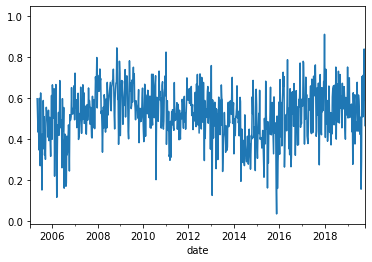

In [56]:
# plot stories by sentiment, resampled weekly, averaged out
tsa.vader.resample('w').mean().plot()

In [57]:
# assign new df for the weekly sample of vader
weekly_tsa=pd.DataFrame(tsa.vader.resample('w').mean())
weekly_tsa

,vader
date,
2005-01-16,0.998220
2005-01-23,NaN
2005-01-30,0.999800
2005-02-06,NaN
2005-02-13,NaN
...,...
2019-09-15,0.712144
2019-09-22,0.589789
2019-09-29,0.839537


In [58]:
# drop 14 nulls
weekly_tsa = weekly_tsa.dropna()
weekly_tsa.isna().sum()

vader    0
dtype: int64

In [59]:
# add vader difference from week to week
weekly_tsa['weekly_diff']= weekly_tsa.vader.diff(1)
weekly_tsa.head()

,vader,weekly_diff
date,,
2005-01-16,0.998220,NaN
2005-01-30,0.999800,0.001580
2005-05-08,0.596417,-0.403383
2005-05-15,0.503421,-0.092997
2005-05-22,0.433512,-0.069909


### What week saw the biggest drop in sentiment?  

In [60]:
weekly_tsa.weekly_diff.idxmin()

Timestamp('2010-08-01 00:00:00')

- At Least 400 Killed in Pakistan Floods (July 30)
- Plane Crash in Pakistan Kills All 152 on Board (July 28)
- U.S. Economy Lost 131,000 Jobs in July; Unemployment Remains at 9.5% (Aug. 6)
- CA Gay Marriage Ban Overturned (Aug. 4)

### Not a lot of concrete evidence of what would cause such a drop

### And the biggest increasee?

In [61]:
weekly_tsa.weekly_diff.idxmax()

Timestamp('2015-11-29 00:00:00')

- 13November2015: Paris terrorist attacks
- Three Killed at Planned Parenthood Shooting in Colorado Springs (Nov. 27)
- Russian Airliner Brought Down by Bomb (Nov. 17)

### Again, nothing concrete: an index of the noise in the data

In [62]:
weekly_tsa.vader.idxmax()

Timestamp('2005-01-30 00:00:00')

In [63]:
weekly_tsa.vader.idxmin()

Timestamp('2015-11-22 00:00:00')

In [64]:
BREAK THE NOTEBOOK

SyntaxError: invalid syntax (<ipython-input-64-07d8789a56ee>, line 1)

## Below begins my attempt to use gensim for LDA topic modeling

In [ ]:
# import gensim
# from gensim.utils import simple_preprocess
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# # stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]
# data = stories.lemmatized.values.tolist()
# data_words = list(sent_to_words(data))
# # remove stop words
# data_words = remove_stopwords(data_words)
# print(data_words[:1][0][:30])

In [ ]:
# import gensim.corpora as corpora
# # Create Dictionary
# id2word = corpora.Dictionary(data_words)
# # Create Corpus
# texts = data_words
# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]
# # View
# print(corpus[:1][0][:30])

In [ ]:
# from pprint import pprint
# # number of topics
# num_topics = 10
# # Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
# # import pyLDAvis.gensim
# import os
# import pyLDAvis.gensim_models as gensimvis
# import pickle 
# import pyLDAvis
# # Visualize the topics
# pyLDAvis.enable_notebook()
# # LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+ str(num_topics)+str(num_topics))
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
# #     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# #     with open(LDAvis_data_filepath, 'wb') as f:
# #         pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# # with open(LDAvis_data_filepath, 'rb') as f:
# #     LDAvis_prepared = pickle.load(f)
# # pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
# LDAvis_prepared

In [ ]:
# type(LDAvis_prepared)

In [ ]:
# BREAK. THIS. NOTEBOOK. 

## The same...but running it on the titles instead of the corpi

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = stories.title.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# import pyLDAvis.gensim
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+ str(num_topics)+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

## Evaluate? (be aware of which  data_words are being sent in)

In [ ]:
# # Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # see https://spacy.io/models/en for info on this pipeline
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
# from pprint import pprint
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

## The following code is commented out bc it takes ages to run, and I have the results csv from when I ran it

In [ ]:
# import numpy as np
# import tqdm
# grid = {}
# grid['Validation_Set'] = {}
# # Topics range
# min_topics = 2
# max_topics = 11
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)
# # Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')
# # Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')
# # Validation sets
# num_of_docs = len(corpus)
# corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
#                # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
#                gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
#                corpus]
# corpus_title = ['75% Corpus', '100% Corpus']
# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }
# # Can take a long time to run
# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     # iterate through validation corpuses
#     for i in range(len(corpus_sets)):
#         # iterate through number of topics
#         for k in topics_range:
#             # iterate through alpha values
#             for a in alpha:
#                 # iterare through beta values
#                 for b in beta:
#                     # get the coherence score for the given parameters
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)
#                     # Save the model results
#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv('lda_tuning_results_corpora.csv', index=False)
#     pbar.close()

In [ ]:
# use the above-selected parameters to train the model

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, "LDAvis_prepared_titles_4topics2.html")

In [ ]:
eval_df = pd.read_csv("lda_tuning_results.csv")
eval_df

In [ ]:
import seaborn as sns
sns.lineplot(data= eval_df,x="Topics",y='Coherence')

In [ ]:
eval_df[eval_df.Topics == 8].groupby(by='Alpha').Coherence.max()

## These were the results as run on the TITLES, not on the stories themselves

# Topic modeling on aggregations?
- melissa block vs the rest maybe??

In [ ]:
stories.head()

In [ ]:
block = stories[stories.host=='melissa block']
block.sample(5)

In [ ]:
other_hosts=stories[stories.host!='melissa block']
other_hosts.sample(5)

In [ ]:
stories.program.value_counts()

In [ ]:
morning_edition = stories[stories.program == 'morning edition']
morning_edition.sample(5)

In [ ]:
news_notes = stories[stories.program == 'news & notes']
news_notes.sample(5)

In [ ]:
tsa.head()

In [ ]:
tsa.index = pd.to_datetime(tsa.index)


In [ ]:
from datetime import datetime

In [ ]:
tsa = tsa.set_index('date').sort_index()

In [ ]:
Obama_election = tsa[datetime(2008,11,7):datetime(2008,11,30)]

In [ ]:
Obama_election.shape

In [ ]:
Trump_election = tsa[datetime(2016,11,7):datetime(2016,11,30)]

In [ ]:
Trump_election.shape

In [ ]:
big_increase = tsa[datetime(2010,8,1):datetime(2010,8,7)]

In [ ]:
big_increase.title.shape#sample(3).to_list()

In [ ]:
big_decrease = tsa[datetime(2015,11,29):datetime(2015,12,5)]

In [ ]:
pd.DataFrame(big_decrease.title)#.sample(3)#.to_list()

## Topic Model for Melissa Block vs. Other Hosts
## Also morning ed vs news and notes (bottom sentiment and top sentiment)

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = Obama_election.title.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
# # Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # see https://spacy.io/models/en for info on this pipeline
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=3, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, "Obama_election_titles_3topics.html")